<h1> CFG Final Project Data Science 1</h1>
<h3> Healthcare and the Pharmaceutical Industry</h3>


<h5>Group members:
Aikaterini Karypidou
Poorna Sujini
Assia Yaqub-Choudhury<h5>

In [1]:
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import os

Question 1: 

>**Most common causes of death wordwide and difference between rich and poor countries.**



>Creating a dataframe **df** by reading the csv file downloaded from Kaggle.

In [2]:
data = pd.read_csv('Death Cause Reason by Country.csv', index_col = "Country Name")

Checking the Data.
>*Are there values missing and what?*

In [3]:
data.isnull().sum()

Covid-19 Deaths                               3
Cardiovascular diseases                       0
Respiratory diseases                          0
Kidney diseases                               0
Neonatal disorders                            0
Meningitis                                    0
Malaria                                       0
Interpersonal violence                        0
HIV/AIDS                                      0
Tuberculosis                                  0
Maternal disorders                            0
Lower respiratory infections                  0
Alcohol use disorders                         0
Diarrheal diseases                            0
Poisoning                                     0
Nutritional deficiencies                      0
Alzheimer's disease                           0
Parkinson's disease                           0
Acute hepatitis                               0
Digestive diseases                            0
Cirrhosis and other chronic liver diseas

> The countries that have null values in covid data are *Greenland, North Korea* and *Turkmenistan*. They are not the countries we will check individually so we decided to drop them.

In [4]:
data.dropna(inplace= True)
print(np.sum(data.isna()))

Covid-19 Deaths                               0
Cardiovascular diseases                       0
Respiratory diseases                          0
Kidney diseases                               0
Neonatal disorders                            0
Meningitis                                    0
Malaria                                       0
Interpersonal violence                        0
HIV/AIDS                                      0
Tuberculosis                                  0
Maternal disorders                            0
Lower respiratory infections                  0
Alcohol use disorders                         0
Diarrheal diseases                            0
Poisoning                                     0
Nutritional deficiencies                      0
Alzheimer's disease                           0
Parkinson's disease                           0
Acute hepatitis                               0
Digestive diseases                            0
Cirrhosis and other chronic liver diseas

>Changing the oriendation of the **df** dataframe.

In [5]:
df = data.T
print(df)

Country Name                                Afghanistan  Albania  Algeria  \
Covid-19 Deaths                                  2201.0   1181.0   2762.0   
Cardiovascular diseases                         61995.0  12904.0  97931.0   
Respiratory diseases                             7082.0    815.0   7528.0   
Kidney diseases                                  5637.0    329.0   8201.0   
Neonatal disorders                              23701.0    161.0   8756.0   
Meningitis                                       1563.0     13.0    292.0   
Malaria                                           530.0      0.0      0.0   
Interpersonal violence                           5015.0     57.0    459.0   
HIV/AIDS                                          318.0      2.0    264.0   
Tuberculosis                                     3627.0     11.0    445.0   
Maternal disorders                               4038.0      3.0    638.0   
Lower respiratory infections                    18697.0    457.0   5786.0   

>Finding the top 5 causes of death and write them in a dictionary where the Key is each coutry's name and the Value is a list of the top 5 causes.

In [6]:
country_list = []
top_5_causes = {}
for (column_name, column_data) in df.iteritems():
    top_series = df[column_name].nlargest(n=5)
    # print("top_series = ", top_series)
    country_list.append(column_name)
    top_list = list(top_series.index)
    # print(top_list)
    top_5_causes[column_name] = top_list

>Checking the dictionary and its properties calling a random country.

In [7]:
print(top_5_causes['Afghanistan'])
print(type(top_5_causes['Afghanistan']))
print(type(top_5_causes))

['Cardiovascular diseases', 'Conflict and terrorism', 'Neonatal disorders', 'Neoplasms', 'Lower respiratory infections']
<class 'list'>
<class 'dict'>


>Create an **all_top_causes** list with all the values for easier data manipulation.

In [8]:
all_top_causes = []
for country in country_list:
    all_top_causes.extend(top_5_causes.get(country))

>Create a **Set** from the **all_top_causes** list to get only the unique values. There are 20 unique causes of death in all the countries.

In [9]:
set_top_causes = set(all_top_causes)
print(set_top_causes)
print(len(set_top_causes))

{'Malaria', "Alzheimer's disease", 'Alcohol use disorders', 'Respiratory diseases', 'Nutritional deficiencies', 'Neoplasms', 'Neonatal disorders', 'Covid-19 Deaths', 'Diabetes', 'Cirrhosis and other chronic liver diseases', 'Kidney diseases', 'Interpersonal violence', 'Road injuries', 'Conflict and terrorism', 'Cardiovascular diseases', 'Tuberculosis', 'Lower respiratory infections', 'Digestive diseases', 'HIV/AIDS', 'Diarrheal diseases'}
20


>Create a dictionary **causes_statistics** with the top 20 causes as keys and their occurences worldwide as values.


In [10]:
causes_statistics = {}
for each_cause in set_top_causes:
    causes_statistics[each_cause] = all_top_causes.count(each_cause)

print(causes_statistics)

{'Malaria': 21, "Alzheimer's disease": 49, 'Alcohol use disorders': 1, 'Respiratory diseases': 77, 'Nutritional deficiencies': 1, 'Neoplasms': 173, 'Neonatal disorders': 44, 'Covid-19 Deaths': 69, 'Diabetes': 51, 'Cirrhosis and other chronic liver diseases': 11, 'Kidney diseases': 39, 'Interpersonal violence': 5, 'Road injuries': 14, 'Conflict and terrorism': 3, 'Cardiovascular diseases': 188, 'Tuberculosis': 7, 'Lower respiratory infections': 78, 'Digestive diseases': 74, 'HIV/AIDS': 19, 'Diarrheal diseases': 16}


>Creating a folder **CausesOfDeathStatistics** in the directory to save the new files we are going to create.

In [11]:
os.mkdir("CausesOfDeathStatistics") 

>Creating a new **causes_statistics.csv** file from the dictionary we created earlier for later reference.

In [12]:
with open('CausesOfDeathStatistics/causes_statistics.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = set_top_causes)
    writer.writeheader()
    writer.writerow(causes_statistics)  ### Caution!!! NOT writerows()

>Creating a **causes_df** dataframe from the **causes_statistics.csv**.

In [13]:
causes_df = pd.read_csv('CausesOfDeathStatistics/causes_statistics.csv')
causes_df

,Malaria,Alzheimer's disease,Alcohol use disorders,Respiratory diseases,Nutritional deficiencies,Neoplasms,Neonatal disorders,Covid-19 Deaths,Diabetes,Cirrhosis and other chronic liver diseases,Kidney diseases,Interpersonal violence,Road injuries,Conflict and terrorism,Cardiovascular diseases,Tuberculosis,Lower respiratory infections,Digestive diseases,HIV/AIDS,Diarrheal diseases
0,21,49,1,77,1,173,44,69,51,11,39,5,14,3,188,7,78,74,19,16


>Transposing the dataframe for easier comprehension.

In [14]:
causes_df = causes_df.T
print(causes_df)

                                              0
Malaria                                      21
Alzheimer's disease                          49
Alcohol use disorders                         1
Respiratory diseases                         77
Nutritional deficiencies                      1
Neoplasms                                   173
Neonatal disorders                           44
Covid-19 Deaths                              69
Diabetes                                     51
Cirrhosis and other chronic liver diseases   11
Kidney diseases                              39
Interpersonal violence                        5
Road injuries                                14
Conflict and terrorism                        3
Cardiovascular diseases                     188
Tuberculosis                                  7
Lower respiratory infections                 78
Digestive diseases                           74
HIV/AIDS                                     19
Diarrheal diseases                      

In [15]:
causes_df = causes_df.sort_values(by=[0], ascending=False)

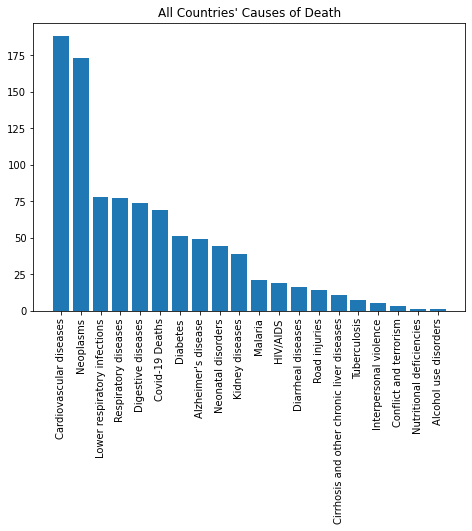

<Figure size 864x864 with 0 Axes>

In [16]:
fig_rich = plt.figure()
ax = fig_rich.add_axes([0,0,1,1])
disease = list(causes_df.index)
frequency = causes_df[0]
ax.bar(disease,frequency)
locs, labels = plt.xticks()
ax.set_title("All Countries' Causes of Death")
plt.xticks(np.arange(0, len(disease)), rotation=90)
plt.figure(figsize = [12, 12])
plt.show()

>Reading the GDP per Capita data from the World Bank in a new **gdp_df** dataframe.

In [17]:
gdp_df = pd.read_csv('GDPPerCapita.csv')

>Retrieving the data for **2020** and **2021**. We chose both years as 2021 alone has a lot of null values including countries of interest.

In [18]:
gdp_df_most_recent = gdp_df[["Country Name", "2020", "2021"]]

>Checking the data

In [19]:
gdp_df_most_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   2020          251 non-null    float64
 2   2021          229 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.4+ KB


>Dropping the countries that do not have any data on the year 2020. Many of these countries do not exist anymore since the dataset include values from 1960.

In [20]:
gdp_df_most_recent.dropna(subset = ["2020"])

,Country Name,2020,2021
0,Aruba,23384.298790,NaN
1,Africa Eastern and Southern,1360.878645,1557.722682
2,Afghanistan,516.747871,NaN
3,Africa Western and Central,1709.764129,1774.921218
4,Angola,1631.431691,2137.909393
...,...,...,...
261,Kosovo,4310.811183,4986.582469
262,"Yemen, Rep.",631.681490,690.759273
263,South Africa,5655.867654,6994.211654
264,Zambia,985.132436,1120.630171


>While we tried to compine the two tables (WHO and WB) we realised that the name of the countries were not spelled the same. We run a few tests to spot the exact problems. The follwing code is dealling with this problems.

>Fixing UK naming problem. In **WHO** table, UK countries are named individual as their health system is independent for each country. However for **World Bank** is named as one called United Kingdom with single GDP per Capita. We decided to make them 4 individual countries in **WB** table all with the same GDPpC and we added one new row for each country in the bottom of the table.

In [21]:
new_row = {"Country Name":"England", "2020": 41098.07865, "2021": 47334.35531}
new_row2 = {"Country Name":"Northern Ireland", "2020": 41098.07865, "2021": 47334.35531}
new_row3 = {"Country Name":"Scotland", "2020": 41098.07865, "2021": 47334.35531}
new_row4 = {"Country Name":"Wales", "2020": 41098.07865, "2021": 47334.35531}
gdp_df_most_recent = gdp_df_most_recent.append(new_row, ignore_index=True)
gdp_df_most_recent = gdp_df_most_recent.append(new_row2, ignore_index=True)
gdp_df_most_recent = gdp_df_most_recent.append(new_row3, ignore_index=True)
gdp_df_most_recent = gdp_df_most_recent.append(new_row4, ignore_index=True)

/var/folders/xb/lk46lmp94hd5pc7q0prq7drm0000gn/T/ipykernel_12282/4083581125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdp_df_most_recent = gdp_df_most_recent.append(new_row, ignore_index=True)
/var/folders/xb/lk46lmp94hd5pc7q0prq7drm0000gn/T/ipykernel_12282/4083581125.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdp_df_most_recent = gdp_df_most_recent.append(new_row2, ignore_index=True)
/var/folders/xb/lk46lmp94hd5pc7q0prq7drm0000gn/T/ipykernel_12282/4083581125.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdp_df_most_recent = gdp_df_most_recent.append(new_row3, ignore_index=True)
/var/folders/xb/lk46lmp94hd5pc7q0prq7drm0000gn/T/ipykernel_12282/4083581125.py:8: FutureWarning: The frame.append method i

>Get the names of the countries as a list according to the **WB** table. Save the number of the countries in a variable.

In [22]:
list_of_gdb_countries = list(gdp_df_most_recent["Country Name"])
first_count = (len(list_of_gdb_countries))

>Checking the list. *'England', 'Northern Ireland', 'Scotland', 'Wales'* are the last countries.

In [23]:
print(first_count, list_of_gdb_countries)

270 ['Aruba', 'Africa Eastern and Southern', 'Afghanistan', 'Africa Western and Central', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Central Europe and the Baltics', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Paci

>Print the **WHO** countries list

In [24]:
print(len(country_list), country_list)

188 ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechoslovakia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 

**WB** has 270 entries and **WHO** has 188 entries.

Some countries hove different spelling so we try to fix that problem. We chose to keep the **WHO** spelling

In [25]:
list_of_gdb_countries = list(map(lambda x: x.replace('Brunei Darussalam', 'Brunei'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Bahamas, The', 'Bahamas'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Congo, Dem. Rep.', 'Democratic Republic of Congo'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Czech Republic', 'Czechoslovakia'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Gambia, The', 'Gambia'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Guinea-Bissau', 'Guinea'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Hong Kong SAR, China', 'Hong Kong'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Iran, Islamic Rep.', 'Iran'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Kyrgyz Republic', 'Kyrgyzstan'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Lao PDR', 'Laos'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace("Korea, Rep.", "South Korea"), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Russian Federation', 'Russia'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Slovak Republic', 'Slovakia'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Syrian Arab Republic', 'Syria'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Turkiye', 'Turkey'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Venezuela, RB', 'Venezuela'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Yemen, Rep.', 'Yemen'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Cabo Verde', 'Cape Verde'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Congo, Rep.', 'Congo'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Egypt, Arab Rep.', 'Egypt'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('West Bank and Gaza', 'Palestine'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('St. Kitts and Nevis', 'Saint Kitts and Nevis'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('St. Lucia', 'Saint Lucia'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines'), list_of_gdb_countries))
list_of_gdb_countries = list(map(lambda x: x.replace('Timor-Leste', 'Timor'), list_of_gdb_countries))

>Checking the differences between the two lists and save them into two new lists of countries to keep and countries to delete so we can check them manually once more before deleting them.

In [26]:
count = 0
kept_countries = []
countries_to_delete = []
for i in list_of_gdb_countries:
    if i in country_list:
        kept_countries.append(i)
    else:
        count += 1
        countries_to_delete.append(i)
print("kept countries:", kept_countries)       
print("countries to delete:", count)

kept countries: ['Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechoslovakia', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea', 'Greece', 'Guatemala', 'Guyana', 'Hong Kong', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jam

>Checking more numbers.

In [27]:
print("old list of gdb countries", first_count)
print("list of countries to delete", len(countries_to_delete))
print("list of death caused countries:",  len(country_list))
print("list of kept countries", len(kept_countries))

old list of gdb countries 270
list of countries to delete 85
list of death caused countries: 188
list of kept countries 185


>Last check

In [28]:
print(len(country_list), country_list)
print(len(list_of_gdb_countries), list_of_gdb_countries)

188 ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechoslovakia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 

>Setting as index of the dataframe the column **Country Name**

In [29]:
gdp_df_most_recent = gdp_df_most_recent.set_index("Country Name")

>Deleting from the dataframe all the entries of the countries that are saved in the **countries_to_delete** list

In [30]:
for i in countries_to_delete:
    gdp_df_most_recent = gdp_df_most_recent.drop(i)

>The updated dataframe has 185 rows.

In [31]:
gdp_df_most_recent

,2020,2021
Country Name,,
Afghanistan,516.747871,NaN
Angola,1631.431691,2137.909393
Albania,5332.160475,6494.385713
Andorra,37416.697720,43047.686270
United Arab Emirates,36284.555240,NaN
...,...,...
Zimbabwe,1214.509820,1737.173977
England,41098.078650,47334.355310
Northern Ireland,41098.078650,47334.355310


>Checking the **top** and **bottom 10** countries by **GDPpC**.

In [32]:
richest_countries = gdp_df_most_recent.nlargest(10, "2020", keep='all')
poorest_countries = gdp_df_most_recent.nsmallest(10, "2020", keep='all')
print("Top 10 Richest Countries:", richest_countries, type(richest_countries))
print("Top 10 Poorest Countries:", poorest_countries, type(poorest_countries))

Top 10 Richest Countries:                        2020          2021
Country Name                             
Monaco         173688.18940           NaN
Luxembourg     116356.15800  135682.79430
Bermuda        107706.03980  110869.46310
Switzerland     87100.41482   93457.44040
Ireland         85422.54287   99152.10257
Norway          67329.67779   89202.75054
United States   63027.67953   69287.53659
Denmark         61063.31643   67803.04710
Singapore       60729.45035   72794.00302
Iceland         59264.03409   68383.76534 <class 'pandas.core.frame.DataFrame'>
Top 10 Poorest Countries:                         2020        2021
Country Name                            
Burundi           233.837510  236.795414
Somalia           438.255166  445.779017
Mozambique        448.843891  500.444809
Madagascar        477.613041  514.905862
Afghanistan       516.747871         NaN
Congo, Dem. Rep.  543.950393  584.106409
Niger             567.669892  594.925109
Liberia           601.063006  673.089

*Creating lists with the **richest** and the **poorest countries**.

In [33]:
list_10_rich_country = list(richest_countries.index)
list_10_poor_country = list(poorest_countries.index)
print(list_10_rich_country, list_10_poor_country)

['Monaco', 'Luxembourg', 'Bermuda', 'Switzerland', 'Ireland', 'Norway', 'United States', 'Denmark', 'Singapore', 'Iceland'] ['Burundi', 'Somalia', 'Mozambique', 'Madagascar', 'Afghanistan', 'Congo, Dem. Rep.', 'Niger', 'Liberia', 'Sudan', 'Yemen, Rep.']


>Two of the countries have the spelling name problem.

In [34]:
list_10_poor_country = list(map(lambda x: x.replace('Congo, Dem. Rep.', 'Democratic Republic of Congo'), list_10_poor_country))
list_10_poor_country = list(map(lambda x: x.replace('Yemen, Rep.', 'Yemen'), list_10_poor_country))

>Creating a dictionary with the **top 5 causes of death** for the **10 richest countries**.

In [35]:
top_5_causes_rich_country = {}
for i in list_10_rich_country:
    top_5_series = df[i].nlargest(n=5)
    top_5_causes_rich_country[i] = list(top_5_series.index)

>Creating a list with the occurences of the death causes and then copy them to a set to delete the duplicates.

In [36]:
all_top_causes_rich_countries = []
for country in list_10_rich_country:
    all_top_causes_rich_countries.extend(top_5_causes_rich_country.get(country))

all_top_causes_rich_countries_set = set(all_top_causes_rich_countries)
print(all_top_causes_rich_countries_set)
print(len(all_top_causes_rich_countries_set))

{"Alzheimer's disease", 'Covid-19 Deaths', 'Diabetes', 'Cardiovascular diseases', 'Respiratory diseases', 'Lower respiratory infections', 'Digestive diseases', 'Kidney diseases', 'Neoplasms'}
9


>Counting the **number of times each disease appears** in the list.

In [37]:
causes_statistics_rich_countries = {}
for each_cause in all_top_causes_rich_countries_set:
    causes_statistics_rich_countries[each_cause] = all_top_causes_rich_countries.count(each_cause)

print(causes_statistics_rich_countries)

{"Alzheimer's disease": 9, 'Covid-19 Deaths': 4, 'Diabetes': 1, 'Cardiovascular diseases': 10, 'Respiratory diseases': 8, 'Lower respiratory infections': 5, 'Digestive diseases': 1, 'Kidney diseases': 2, 'Neoplasms': 10}


>Create a **causes_statistics_rich_countries.csv** with the statistics of the **top 10 richest countries**.

In [38]:
with open('CausesOfDeathStatistics/causes_statistics_rich_countries.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = all_top_causes_rich_countries_set)
    writer.writeheader()
    writer.writerow(causes_statistics_rich_countries)  ### Caution!!! NOT writerows()

>Doing the same for the **top 10 poorest countries**.

In [39]:
top_5_causes_poor_country = {}
for i in list_10_poor_country:
    top_5_series = df[i].nlargest(n=5)
    top_5_causes_poor_country[i] = list(top_5_series.index)
print(top_5_causes_poor_country)

all_top_causes_poor_countries = []
for country in list_10_poor_country:
    all_top_causes_poor_countries.extend(top_5_causes_poor_country.get(country))

all_top_causes_poor_countries_set = set(all_top_causes_poor_countries)
print(all_top_causes_poor_countries_set)
print(len(all_top_causes_poor_countries_set))

causes_statistics_poor_countries = {}
for each_cause in all_top_causes_poor_countries_set:
    causes_statistics_poor_countries[each_cause] = all_top_causes_poor_countries.count(each_cause)

print(causes_statistics_poor_countries)

with open('CausesOfDeathStatistics/causes_statistics_poor_countries.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = all_top_causes_poor_countries_set)
    writer.writeheader()
    writer.writerow(causes_statistics_poor_countries)  ### Caution!!! NOT writerows()

{'Burundi': ['Cardiovascular diseases', 'Diarrheal diseases', 'Neonatal disorders', 'Tuberculosis', 'Malaria'], 'Somalia': ['Lower respiratory infections', 'Tuberculosis', 'Neonatal disorders', 'Cardiovascular diseases', 'Diarrheal diseases'], 'Mozambique': ['HIV/AIDS', 'Cardiovascular diseases', 'Neonatal disorders', 'Tuberculosis', 'Malaria'], 'Madagascar': ['Cardiovascular diseases', 'Diarrheal diseases', 'Lower respiratory infections', 'Neonatal disorders', 'Tuberculosis'], 'Afghanistan': ['Cardiovascular diseases', 'Conflict and terrorism', 'Neonatal disorders', 'Neoplasms', 'Lower respiratory infections'], 'Democratic Republic of Congo': ['Cardiovascular diseases', 'Malaria', 'Tuberculosis', 'Lower respiratory infections', 'Neonatal disorders'], 'Niger': ['Diarrheal diseases', 'Malaria', 'Lower respiratory infections', 'Neonatal disorders', 'Cardiovascular diseases'], 'Liberia': ['Malaria', 'Cardiovascular diseases', 'Diarrheal diseases', 'Neonatal disorders', 'Neoplasms'], 'Suda

>Creating two dataframes **rich_df** and **poor_df** with the statistics we just saved.

In [40]:
rich_df = pd.read_csv('CausesOfDeathStatistics/causes_statistics_rich_countries.csv')
poor_df = pd.read_csv('CausesOfDeathStatistics/causes_statistics_poor_countries.csv')

>Change the orientation of the dataframes

In [41]:
rich_df = rich_df.T
poor_df = poor_df.T

In [42]:
rich_df = rich_df.sort_values(by=[0], ascending=False)
poor_df = poor_df.sort_values(by=[0], ascending=False)

>Creating a plot for the **richest countries**.

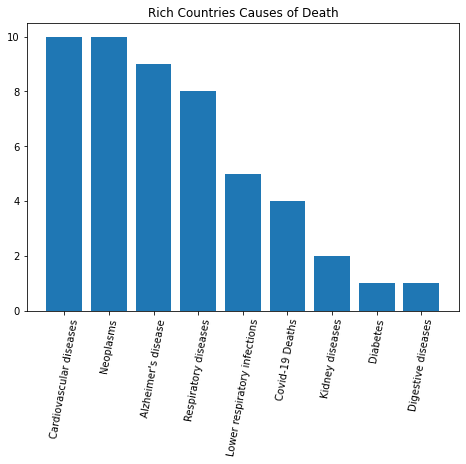

<Figure size 864x864 with 0 Axes>

In [43]:
fig_rich = plt.figure()
ax = fig_rich.add_axes([0,0,1,1])
disease = list(rich_df.index)
frequency = rich_df[0]
ax.bar(disease,frequency)
locs, labels = plt.xticks()
ax.set_title('Rich Countries Causes of Death')
plt.xticks(np.arange(0, len(disease)), rotation=80)
plt.figure(figsize = [12, 12])
plt.show()

>And a plot for the **poorest countries**.

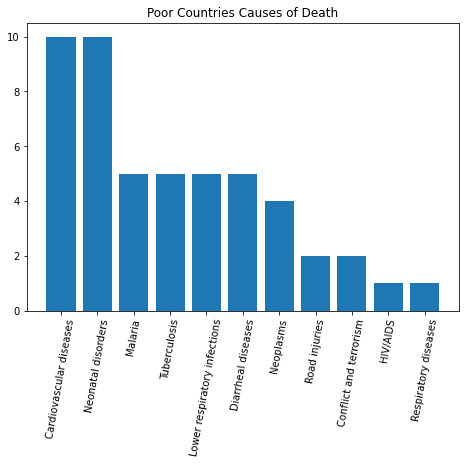

<Figure size 864x864 with 0 Axes>

In [44]:
fig_poor = plt.figure()
ax = fig_poor.add_axes([0,0,1,1])
disease = list(poor_df.index)
frequency = poor_df[0]
ax.bar(disease,frequency)
locs, labels = plt.xticks()
ax.set_title('Poor Countries Causes of Death')
plt.xticks(np.arange(0, len(disease)), rotation=80)
plt.figure(figsize = [12, 12])
plt.show()

Question 2:

>**How were the profits of the pharmaceutical companies affected since 2019 and up to 2021 by the Covid Vaccination and the lockdown.**

>We are retrieving data from the stock market through **yahoo API** for the top 10 pharmaceutical companies in the world for 2021 according to https://www.drugdiscoverytrends.com:

>>1. Pfizer
>>2. Roche Pharmaceuticals (division of Roche Group)
>>3. Merck & Co.
>>4. Janssen (Johnson & Johnson’s pharmaceutical segment)
>>5. Bristol Myers Squibb
>>6. AstraZeneca
>>7. Novartis
>>8. AbbVie
>>9. Eli Lilly
>>10. Sanofi

>A list of dictionaries inside a dictionary that contains the name of the company and its stock market name.

In [45]:
ph_dict = {"pharma_name": [{"Pfizer": "PFE"}, {"Roche": "RHHBY"}, {"Merck": "MRK"}, {"Janssen": "JNJ"}, 
            {"Bristol_Myers": "BMY"}, {"AstraZeneca": "AZN"}, {"Novartis": "NVS"}, {"AbbVie": "ABBV"},
            {"EliLilly": "LLY"}, {"Sanofi": "SAN"}]}

>Deciding which dates we are looking for.

>The following example is from the 1st of January 2019 and for 2 years until the 31st of December 2021.

>The choice of these dates was based on the idea that we want to see how the pandemic has affected the stock market. So we chose to retrieve data from 2019 that was the year before the pandemic to have a view of the "normal" market, 2020 that was the year the lockdown began and 2021 when the first vaccines when on the market.

In [46]:
start_date=dt.datetime(2019, 1, 1)
end_date=dt.datetime(2021, 12, 31)

>Create a folder **stock_market_data** to save the .csv files are going to be created

In [47]:
os.mkdir("stock_market_data") 

>A function that retrieves data from stock market through **Yahoo API** and writes it in a .csv file. Returns None.
It takes **4 parameters**. The **name of the company**, the **short name of the company in the stock market**, the **start date** of the search request and the **end date** of the search request. It contains a print function to make sure that it keeps executing until we run through the whole dictionary.

In [48]:
def get_data(pharma_name, stock_market_name, start_date, end_date):
    '''
    Writes a csv file with the stock market data for specific date. The date format has to be dt.datetime(year, month, day).
    '''
    print("Running", i + 1 , "time") # checking that the code doesn't break and if it does when?
    this_pharma_name = pdr.get_data_yahoo(stock_market_name, start_date, end_date)
    this_pharma_name.to_csv("stock_market_data/{}.csv".format(pharma_name),  date_format='%Y-%m-%d')
    return

>We call our **get_data()** function for each dictionary in our list of dictionaries with the pharmaceutical companies.

In [49]:
i = 0
while i < len(ph_dict["pharma_name"]):
    for key, value in ph_dict["pharma_name"][i].items():
        get_data(key, value, start_date, end_date)
        i = i + 1

Running 1 time
Running 2 time
Running 3 time
Running 4 time
Running 5 time
Running 6 time
Running 7 time
Running 8 time
Running 9 time
Running 10 time


>We have saved in our folder a **pharmaceutical_company_name.csv** for every company in the list.

>The following function is reading any **given name .csv** file in **stock_market_data** folder

In [50]:
def read_each_file(pharma_name):
            pharma_csv = pd.read_csv('stock_market_data/{}.csv'.format(pharma_name), header=0, parse_dates=True)
            return pharma_csv

>Creating a list of **colours**. Importing **matplotlib.colors** is required. It is done on the top.

In [51]:
colour_list = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]

>We draw a lineplot for each company

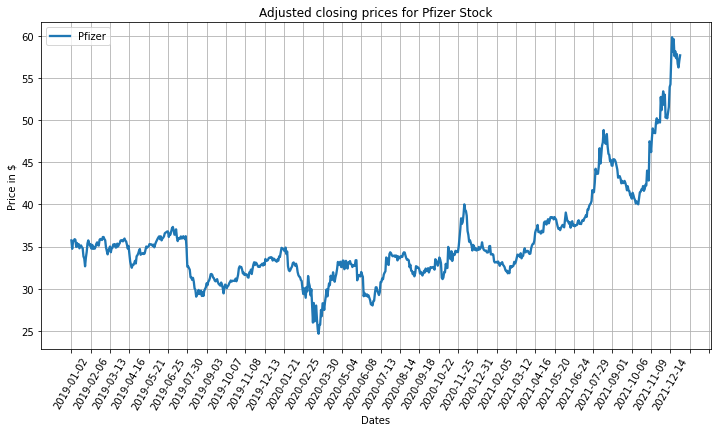

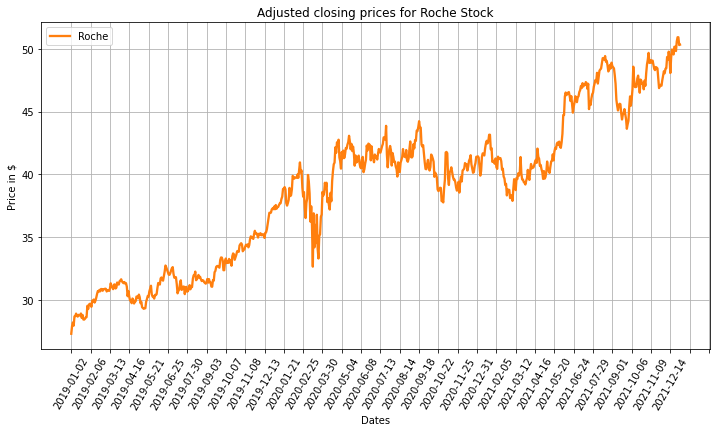

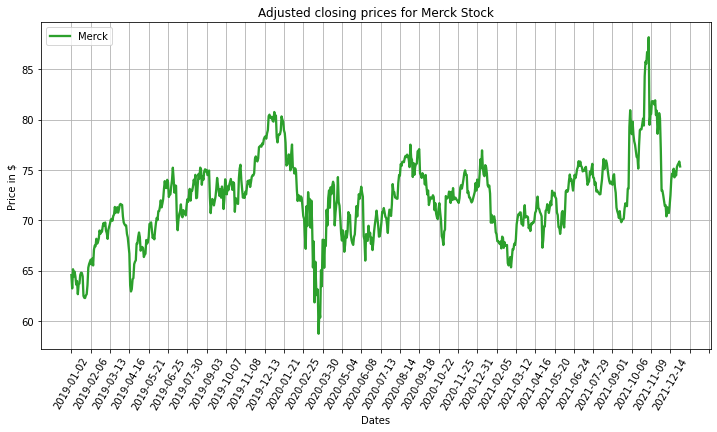

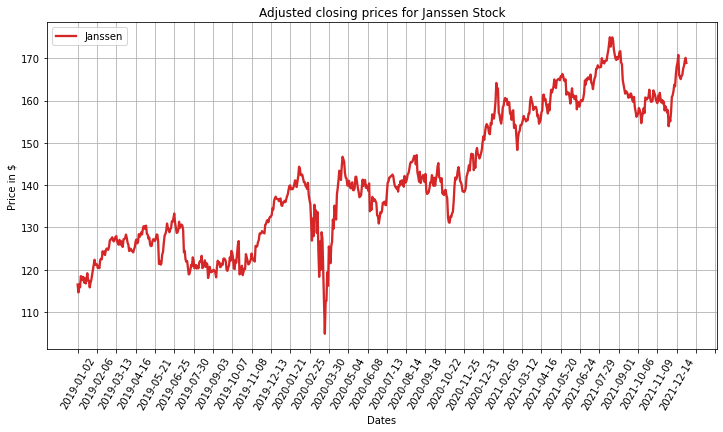

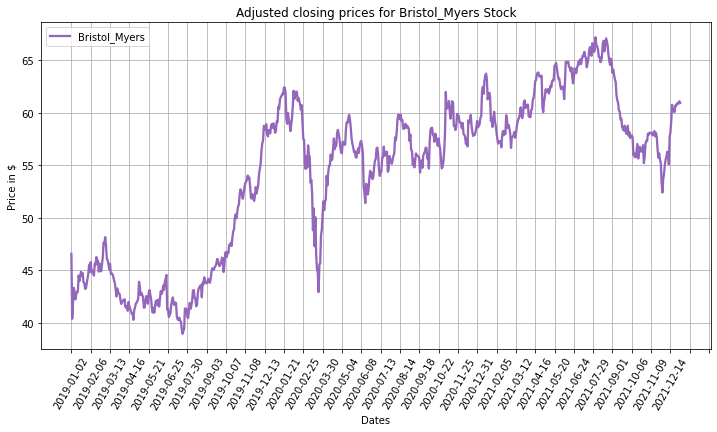

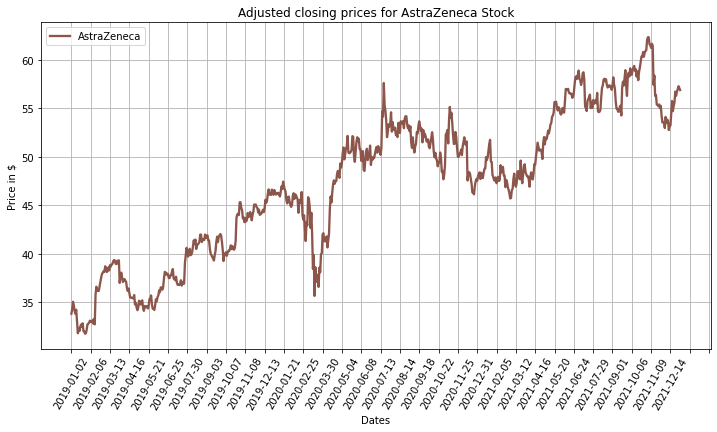

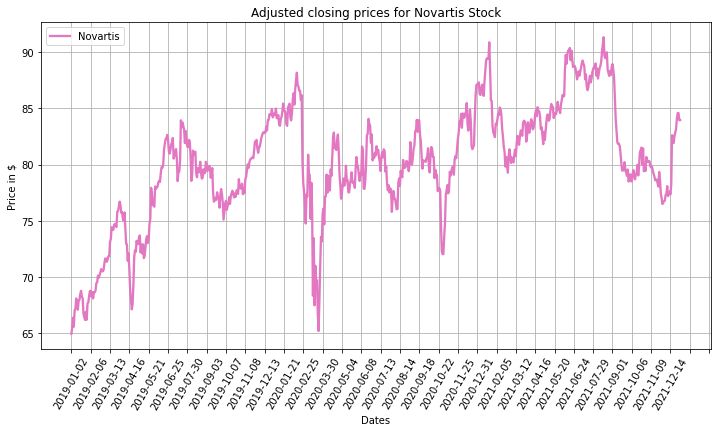

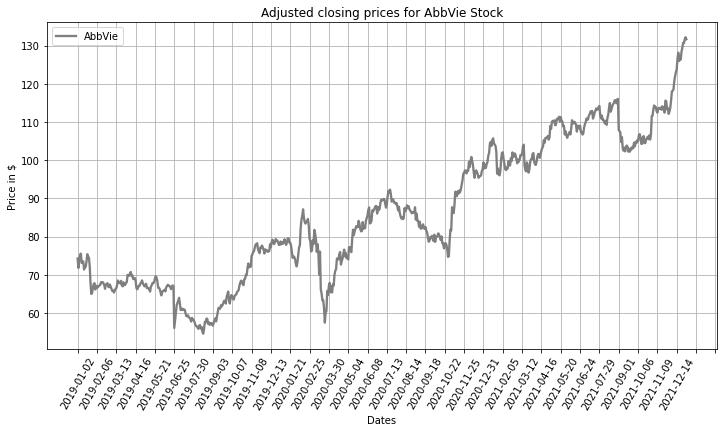

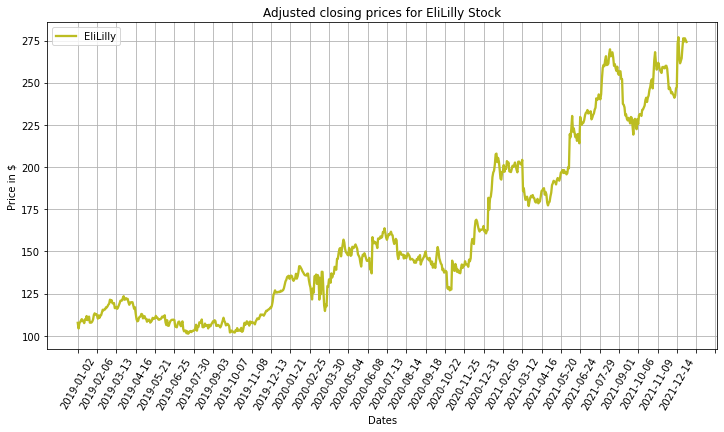

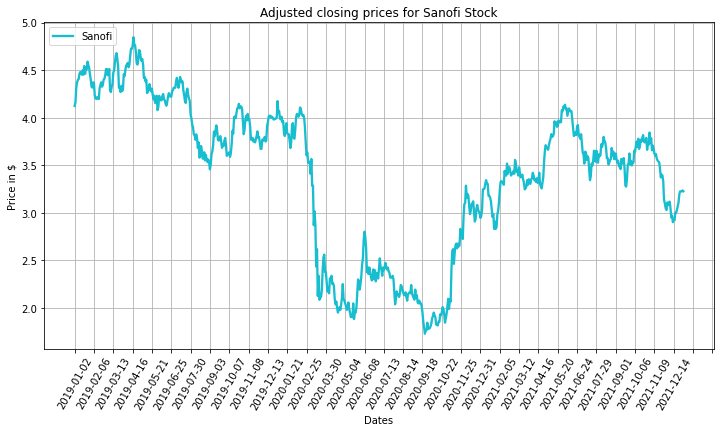

In [52]:
i = 0
x_axis = read_each_file('Pfizer')["Date"].tolist()
while i < len(ph_dict["pharma_name"]):
    plt.figure(figsize = [12, 6])
    for item in ph_dict["pharma_name"][i]:
        y_axis = read_each_file(item)["Adj Close"].tolist()
        # Get the data from the x axis
        locs, labels = plt.xticks()
        plt.xticks(np.arange(0, 3000, step=24), rotation=60) # make a list of the x axis labels to add here
        # Create a lineplot
        plt.plot(x_axis, y_axis, color= colour_list[i] , label = item, linewidth=2.3)
        # choose the legend titles
        plt.title("Adjusted closing prices for {} Stock".format(item))
        plt.ylabel("Price in $")
        plt.xlabel("Dates")
        plt.legend(loc = 'upper left')
        plt.grid()
        plt.show()
        i = i + 1

>Create one plot with all the companies

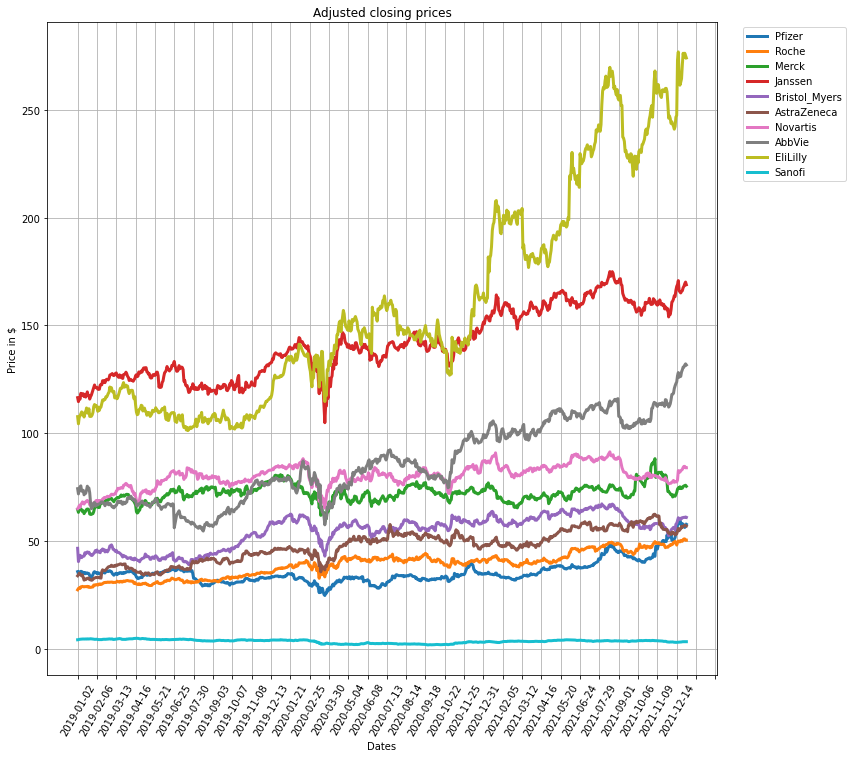

In [53]:
i = 0
plt.figure(figsize = [12, 12])
x_axis = read_each_file('Pfizer')["Date"].tolist()
while i < len(ph_dict["pharma_name"]):
    for item in ph_dict["pharma_name"][i]:

        y_axis = read_each_file(item)["Adj Close"].tolist()
        # Get the data from the x axis
        locs, labels = plt.xticks()
        plt.xticks(np.arange(0, 3000, step=24), rotation=60) # make a list of the x axis labels to add here
        # Create a lineplot
        plt.plot(x_axis, y_axis, color= colour_list[i] , label = item, linewidth=3)
        i = i + 1
     
# choose the legend titles
plt.title("Adjusted closing prices")
plt.ylabel("Price in $")
plt.xlabel("Dates")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.grid()
plt.show()

>**PharmaData.csv** was created manually by reading each company's **Annual Report for 2021**. We did a research for **xbrl** files of the same time period but the companies do not share this data publicly.

In [54]:
revenue = pd.read_csv('PharmaData.csv', header=0)

>An illustration of the **total revenue** of the companies for the calendar year **2021**. We can literaly see their slice in the pie of the market. **Janssen** had the highest revenue for the year and **Eli Lilly** the lowest.

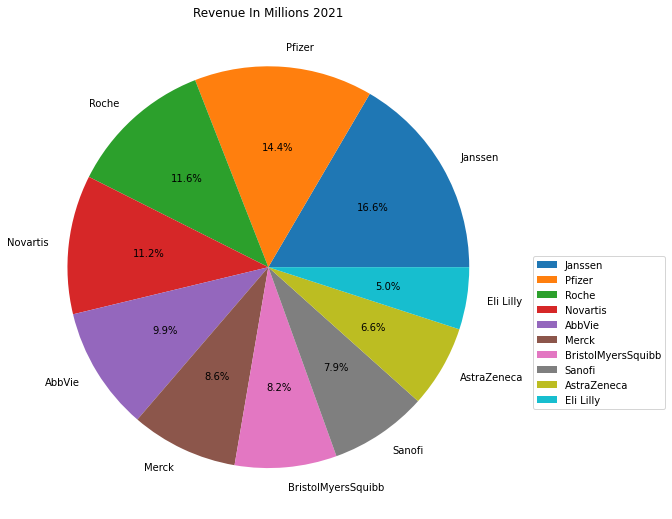

In [55]:
revenue = revenue.sort_values(by=['TotalRevenueInMillions'], ascending=False)
labels = list(revenue.Companies_2021)
plt.figure(figsize = [9, 9])
plt.axis("equal")
plt.pie(revenue['TotalRevenueInMillions'], labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.2))
plt.title("Revenue In Millions 2021")
plt.show()

>A representation of the **companies sale growth** for **2021**. **Pfizer** and **Astra Zeneca** are the two top companies that raised their sales and they are covering together **almost 3/5 of the pie**. Also, they are the two first companies that released the same year a vaccine for Covid-19. **Janssen** have released a vaccine too but much later.

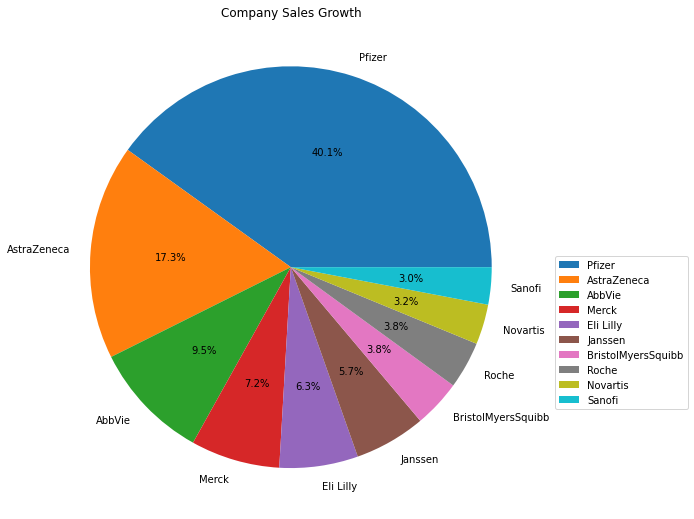

In [56]:
revenue = revenue.sort_values(by=['CompanySalesGrowth'], ascending=False)
labels = list(revenue.Companies_2021)
plt.figure(figsize = [9, 9])
plt.axis("equal")
plt.pie(revenue['CompanySalesGrowth'], labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.2))
plt.title("Company Sales Growth")
plt.show()

>Last graph is to present the percentage of the **Earnings Per Share** per Company.


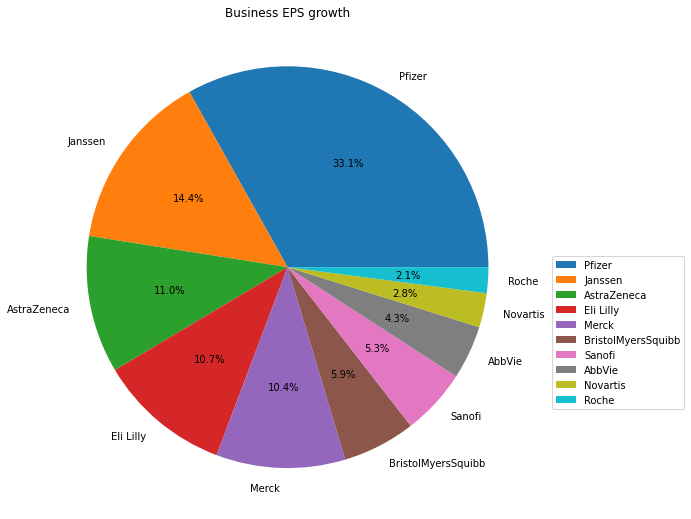

In [57]:
revenue = revenue.sort_values(by=['BusinessEPSgrowth'], ascending=False)
labels = list(revenue.Companies_2021)
plt.figure(figsize = [9, 9])
plt.axis("equal")
plt.pie(revenue['BusinessEPSgrowth'], labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.2))
plt.title("Business EPS growth")
plt.show()

>Question 3:
>>**Best-selling pharmaceutical drug by each top 10 pharma company and what it treats, compared to top causes of death for 2021.**

>Creating a new dataframe according to Question 3 needs. It is a sub-dataframe from **PharmaData.csv**

In [58]:
q3_df = revenue[["Companies_2021", "What it treats", "RevenueOfThedrugInMillions", "TotalRevenueInMillions"]]

In [59]:
q3_df

,Companies_2021,What it treats,RevenueOfThedrugInMillions,TotalRevenueInMillions
0,Pfizer,Covid 19,36781,81288
3,Janssen,Crohn's disease,9134,93775
5,AstraZeneca,Cancer,5015,37417
8,Eli Lilly,Diabetes,6472,28318
2,Merck,Cancer,17186,48704
4,BristolMyersSquibb,Cancer,12821,46385
9,Sanofi,Eczema,5900,44563
7,AbbVie,Arthritis,20694,56197
6,Novartis,Psoriasis/arthritis,4718,63312
1,Roche,Multiple Sclerosis,5055,65850


>Creating a new column in the **q3_df** with **the percentage of the revenue of each drug to the total revenue of each company**.

In [60]:
per100_of_drug = q3_df['RevenueOfThedrugInMillions'] * 100 / q3_df['TotalRevenueInMillions']
per100_of_drug = list(per100_of_drug)

In [61]:
q3_df["Drug revenue as *100 of the total"] = per100_of_drug

/var/folders/xb/lk46lmp94hd5pc7q0prq7drm0000gn/T/ipykernel_12282/3911304747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_df["Drug revenue as *100 of the total"] = per100_of_drug


In [62]:
q3_df

,Companies_2021,What it treats,RevenueOfThedrugInMillions,TotalRevenueInMillions,Drug revenue as *100 of the total
0,Pfizer,Covid 19,36781,81288,45.247761
3,Janssen,Crohn's disease,9134,93775,9.740336
5,AstraZeneca,Cancer,5015,37417,13.402999
8,Eli Lilly,Diabetes,6472,28318,22.854721
2,Merck,Cancer,17186,48704,35.286629
4,BristolMyersSquibb,Cancer,12821,46385,27.640401
9,Sanofi,Eczema,5900,44563,13.239683
7,AbbVie,Arthritis,20694,56197,36.824030
6,Novartis,Psoriasis/arthritis,4718,63312,7.451984
1,Roche,Multiple Sclerosis,5055,65850,7.676538


>Drawing a plot with the results.

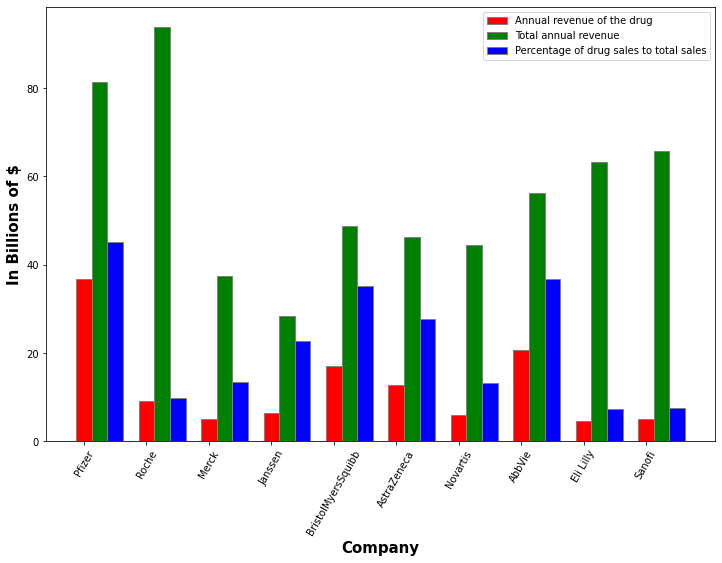

In [63]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
x = q3_df.index.tolist()
x_labels = q3_df['Companies_2021']

# set height of bar
RevenueOfThedrugInMillions = (q3_df['RevenueOfThedrugInMillions']/1000).tolist()
TotalRevenueInMillions = (q3_df['TotalRevenueInMillions']/1000).tolist()
per100_of_drug_bar = q3_df['Drug revenue as *100 of the total'].tolist()
 
# Set position of bar on X axis
br1 = np.arange(len(RevenueOfThedrugInMillions))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, RevenueOfThedrugInMillions, color ='r', width = barWidth,
        edgecolor ='grey', label ='Annual revenue of the drug')
plt.bar(br2, TotalRevenueInMillions, color ='g', width = barWidth,
        edgecolor ='grey', label ='Total annual revenue')
plt.bar(br3, per100_of_drug_bar, color ='b', width = barWidth,
        edgecolor ='grey', label ='Percentage of drug sales to total sales')
 
# Adding Xticks
plt.xlabel('Company', fontweight ='bold', fontsize = 15)
plt.ylabel('In Billions of $', fontweight ='bold', fontsize = 15)
plt.xticks(x, x_labels, rotation='60')
plt.legend()
plt.show()